In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import env
import wrangle1

df, train, validate, test = wrangle1.wrangle_zillow()


# 1 
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df, train, validate, test = wrangle1.wrangle_zillow()

In [3]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'fips'],
      dtype='object')

In [4]:
df.shape, train.shape, validate.shape, test.shape

((2100070, 6), (1176039, 6), (504017, 6), (420014, 6))

In [5]:
x_train = train.drop(columns=['taxvaluedollarcnt'])
y_train = train.taxvaluedollarcnt

x_validate = validate.drop(columns=['taxvaluedollarcnt'])
y_validate = validate.taxvaluedollarcnt

x_test = test.drop(columns=['taxvaluedollarcnt'])
y_test = test.taxvaluedollarcnt

# Attempt higher efficiency, skip for now

In [6]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [7]:
train_s, validate_s, test_s = scale_data(train, validate, test)

In [8]:
# scaler = MinMaxScaler()
# # Note that we only call .fit with the training data,
# # but we use .transform to apply the scaling to all the data splits.
# scaler.fit(x_train)

# x_train_scaled = scaler.transform(x_train)
# x_validate_scaled = scaler.transform(x_validate)
# x_test_scaled = scaler.transform(x_test)

In [9]:
x_train_s = train_s.drop(columns=['taxvaluedollarcnt'])
y_train_s = train_s.taxvaluedollarcnt

x_validate_s = validate_s.drop(columns=['taxvaluedollarcnt'])
y_validate_s = validate_s.taxvaluedollarcnt

x_test_s = test_s.drop(columns=['taxvaluedollarcnt'])
y_test_s = test_s.taxvaluedollarcnt

In [10]:
x_train_s

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips
415076,0.500000,0.307692,0.081973,1971.0,6037.0
396128,0.666667,0.307692,0.102481,1965.0,6059.0
51748,0.500000,0.230769,0.072561,1955.0,6059.0
1172803,0.500000,0.384615,0.152617,1987.0,6059.0
1341986,0.666667,0.461538,0.160053,1990.0,6037.0
...,...,...,...,...,...
593523,0.500000,0.307692,0.114274,1970.0,6037.0
1040025,0.166667,0.153846,0.029280,1965.0,6037.0
1889920,0.666667,0.307692,0.142392,1964.0,6037.0
614976,0.333333,0.153846,0.060710,1949.0,6037.0


# still dont see the diffenece

In [11]:
cols_s = list(x_train_s.columns)

bedroomcnt


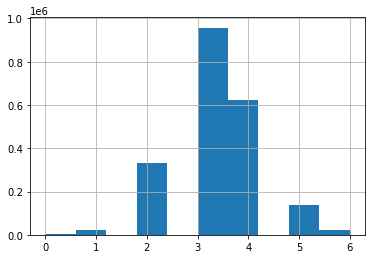

bathroomcnt


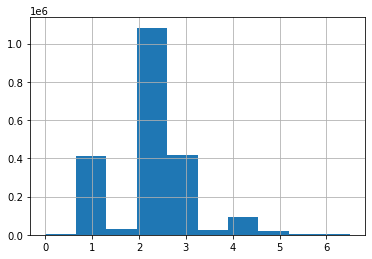

calculatedfinishedsquarefeet


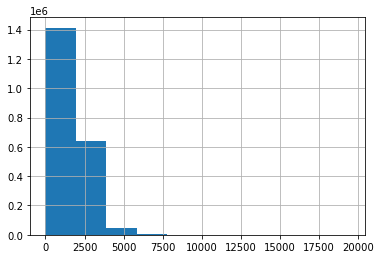

yearbuilt


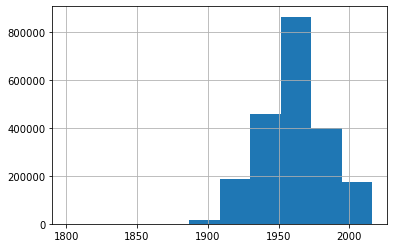

fips


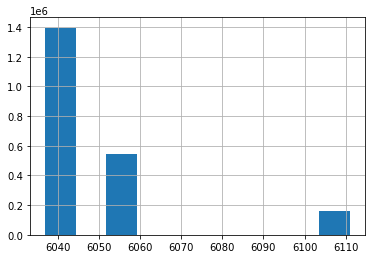

In [12]:
for col in cols_s:
    print(col)
    df[col].hist()
    plt.show()

In [13]:
cols =  list(x_train.columns)

bedroomcnt


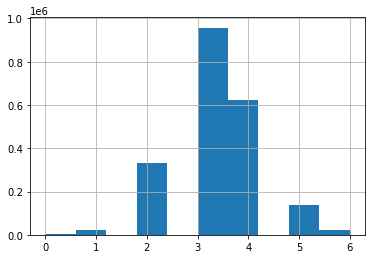

bathroomcnt


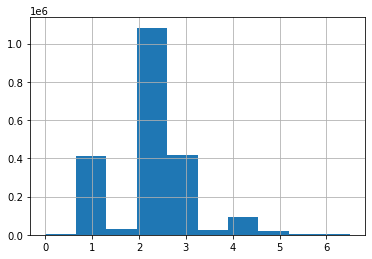

calculatedfinishedsquarefeet


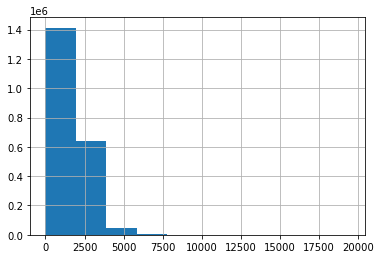

yearbuilt


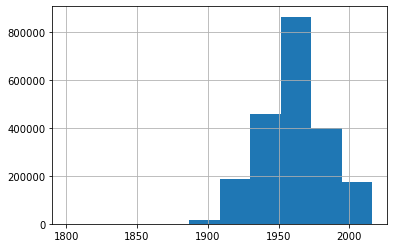

fips


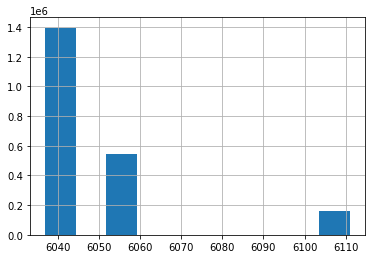

In [14]:
for col in x_train.columns:
    print(col)
    df[col].hist()
    plt.show()

# Attempt failed, try again later

# Doing assignment using single subset

In [15]:
train_subset = x_train['bathroomcnt']

In [16]:
train_subset = pd.DataFrame(train_subset)

In [17]:
train_subset.head()

,bathroomcnt
415076,2.0
396128,2.0
51748,1.5
1172803,2.5
1341986,3.0


mms = MinMaxScaler()

mms.fit(train_subset)

train_mms = mms.transform(train_subset)?


#why do i keep getting this error
ValueError: Expected 2D array, got 1D array instead:
array=[2.  2.  1.5 ... 2.  1.  1.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
mms = MinMaxScaler()

mms.fit(train_subset)

train_mms = mms.transform(train_subset)

In [19]:
train_mms = pd.DataFrame(train_mms, columns=list(train_subset.columns))

In [20]:
train_mms.head(3)

,bathroomcnt
0,0.307692
1,0.307692
2,0.230769


Text(0.5, 1.0, 'Scaled')

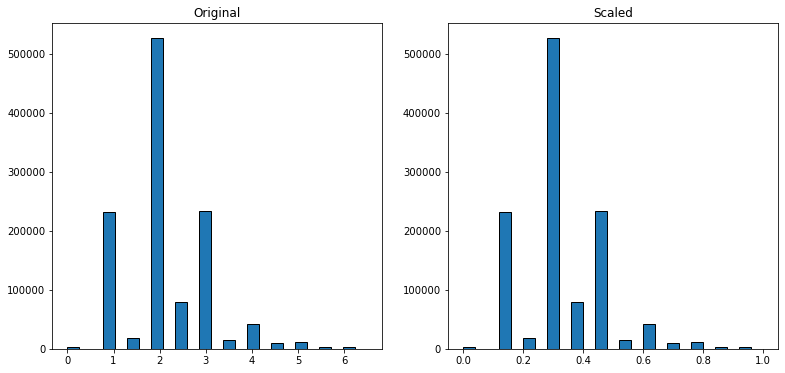

In [21]:
#Visualize the difference between unscaled/scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathroomcnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms['bathroomcnt'], bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

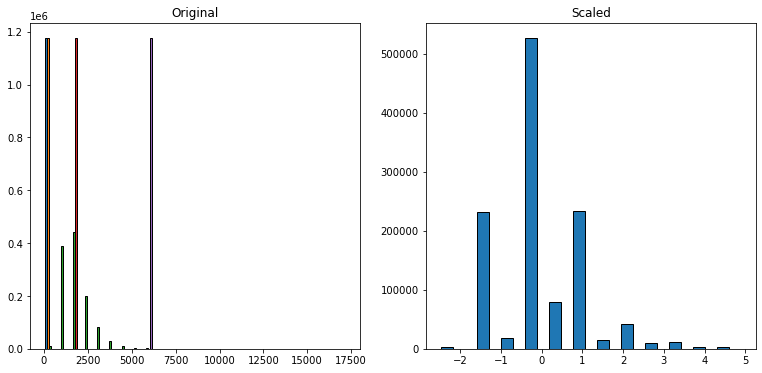

In [22]:
scaler = StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train_subset)

x_train_ss = scaler.transform(train_subset)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_ss, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

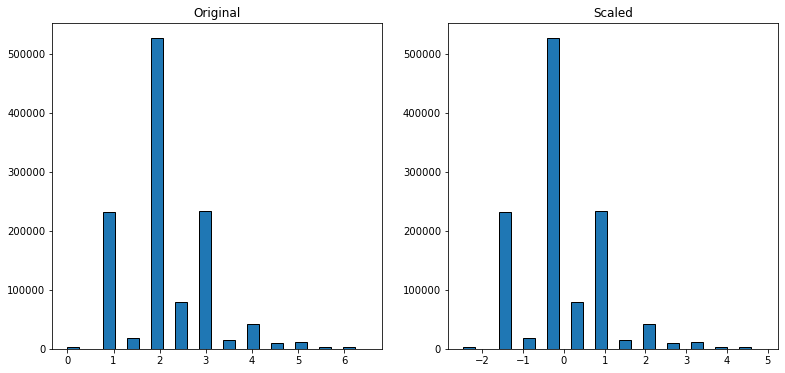

In [23]:
rs = RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
rs.fit(train_subset)

x_train_rs = scaler.transform(train_subset)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_rs, bins=25, ec='black')
plt.title('Scaled')

# 2
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [24]:
rs.inverse_transform(x_train_rs)

array([[1.78830097],
       [1.78830097],
       [1.22234624],
       ...,
       [1.78830097],
       [0.65639152],
       [1.22234624]])

In [25]:
pd.DataFrame(rs.inverse_transform(x_train_rs)).head()

,0
0,1.788301
1,1.788301
2,1.222346
3,2.354256
4,2.920210


In [26]:
train_subset.head()

,bathroomcnt
415076,2.0
396128,2.0
51748,1.5
1172803,2.5
1341986,3.0


# 3 
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Text(0.5, 1.0, 'Scaled')

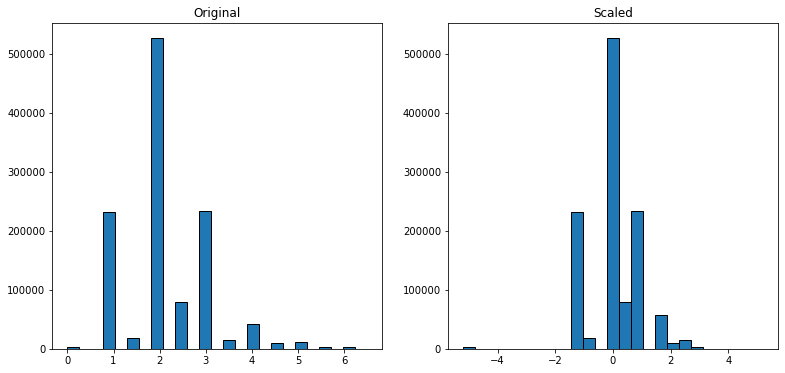

In [27]:
scaler = QuantileTransformer(output_distribution = 'normal')
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train_subset)

x_train_scaled = scaler.transform(train_subset)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 4
Use the QuantileTransformer, but omit the output_distribution argument. 
Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

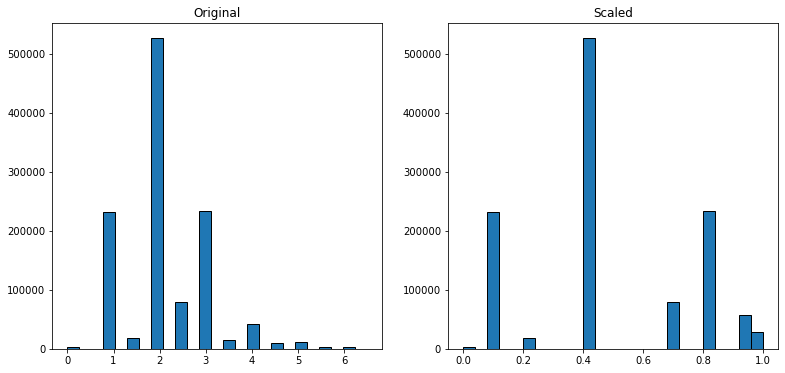

In [28]:
scaler = QuantileTransformer()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train_subset)

x_train_scaled = scaler.transform(train_subset)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 5 

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [29]:
#modeled after class review

In [30]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [31]:
train_s, validate_s, test_s = scale_data(train, validate, test)

In [32]:
train_s.shape, validate_s.shape, test_s.shape

((1176039, 6), (504017, 6), (420014, 6))

In [33]:
df.shape

(2100070, 6)